In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
%cd '/content/drive/My Drive/DigiKala'

/content/drive/My Drive/DigiKala


In [37]:
import numpy as np
import pandas as pd

import os
from tqdm import tqdm

import cv2 
import matplotlib.pyplot as plt  
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
 
import tensorflow as tf 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping

In [38]:
class_names = ['pink', 'purple', 'yellow', 'orange', 'white', 'silver', 
               'grey', 'black', 'red', 'brown', 'green', 'blue']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

num_classes = len(class_names)

In [39]:
TRAIN_PATH = './train'
TEST_PATH = './test'
IMAGE_SIZE = (50, 50)

In [40]:
def load_train_data():
    
  dataset = TRAIN_PATH

  # Iterate through training and test sets
  images = []
  labels = []
  
  # Iterate through each folder corresponding to a category
  for folder in os.listdir(dataset):
    label = class_names_label[folder]
    
    # Iterate through each image in our folder
    for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        
      # Get the path name of the image
      img_path = os.path.join(os.path.join(dataset, folder), file)
      
      # Open and resize the img
      image = cv2.imread(img_path)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, IMAGE_SIZE)
      
      # Append the image and its corresponding label to the output
      images.append(image)
      labels.append(label)  

  return (images, labels)

In [41]:
(train_images, train_labels) = load_train_data()

100%|██████████| 651/651 [00:01<00:00, 368.48it/s]


In [42]:
def load_test_data():
    
  dataset = TEST_PATH

  # Iterate through training and test sets
  images = []
    
  # Iterate through each image in our folder
  for file in tqdm(os.listdir(os.path.join(dataset))):
      
    # Get the path name of the image
    img_path = os.path.join(os.path.join(dataset), file)
    
    # Open and resize the img
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    
    # Append the image to the output
    images.append(image)    

  return images

In [43]:
test_images = load_test_data()

100%|██████████| 2673/2673 [00:06<00:00, 398.83it/s]


In [44]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [45]:
def display_random_image(class_names, images, labels):
  """
    Display a random image from the images array and its correspond label from the labels array.
  """
  images = np.array(images)
  index = np.random.randint(images.shape[0])
  plt.figure()
  plt.imshow(images[index])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('Image #{} : '.format(index) + class_names[labels[index]])
  plt.show()

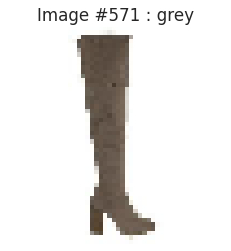

In [46]:
display_random_image(class_names, train_images, train_labels)

In [47]:
# scale the data
X_train = np.array(train_images) / 255.0 
y_train = np.array(train_labels)
X_test = np.array(test_images) / 255.0

*** 
Modeling

In [90]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)), 
    MaxPooling2D(2,2),
    Dropout(0.5),
    
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    
    Flatten(),
    Dense(128, activation=tf.nn.relu),
    Dense(num_classes, activation=tf.nn.softmax)
])

In [91]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [92]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size = 128, 
                    epochs = 50, 
                    validation_split = 0.3)
                    #callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/50
35/35 [==============================] - 1s 16ms/step - loss: 2.3634 - accuracy: 0.1903 - val_loss: 2.1844 - val_accuracy: 0.3146
Epoch 2/50
35/35 [==============================] - 0s 10ms/step - loss: 1.8478 - accuracy: 0.3824 - val_loss: 1.6999 - val_accuracy: 0.4434
Epoch 3/50
35/35 [==============================] - 0s 10ms/step - loss: 1.4882 - accuracy: 0.4900 - val_loss: 1.4382 - val_accuracy: 0.5459
Epoch 4/50
35/35 [==============================] - 0s 10ms/step - loss: 1.2531 - accuracy: 0.5789 - val_loss: 1.1768 - val_accuracy: 0.6255
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 1.1176 - accuracy: 0.6293 - val_loss: 1.1744 - val_accuracy: 0.6223
Epoch 6/50
35/35 [==============================] - 0s 10ms/step - loss: 1.0926 - accuracy: 0.6256 - val_loss: 1.0413 - val_accuracy: 0.6635
Epoch 7/50
35/35 [==============================] - 0s 10ms/step - loss: 1.0266 - accuracy: 0.6574 - val_loss: 1.0321 - val_accuracy: 0.6790
Epoch 8/50
35

In [93]:
def plot_accuracy_loss(history):
  """
      Plot the accuracy and the loss during the training of the nn.
  """
  fig = plt.figure(figsize=(10,5))

  # Plot accuracy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],'bo--', label = "acc")
  plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  # Plot loss function
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--', label = "loss")
  plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()

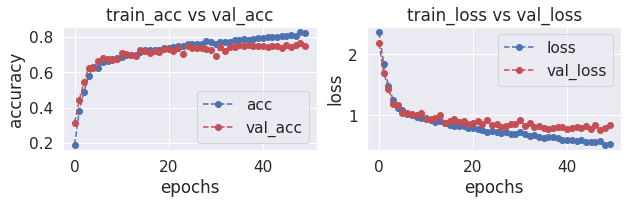

In [94]:
plot_accuracy_loss(history)

In [95]:
predictions = model.predict(X_test)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

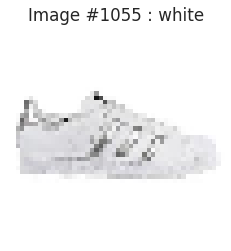

In [96]:
display_random_image(class_names, test_images, pred_labels)

In [97]:
images = os.listdir('./test')

d1 = pd.DataFrame(images)
d2 = pd.DataFrame(pred_labels + 1)
df_final = pd.concat([d1, d2], axis=1, ignore_index= True)
df_final.head()

,0,1
0,117054004.jpg,6
1,105643806.jpg,8
2,117230323.jpg,9
3,117227001.jpg,11
4,117017561.jpg,5


In [98]:
df_final.to_csv('color_cnn.csv', index = False, header=['file_name', 'color_id'])